<a href="https://colab.research.google.com/github/SIDDHARTHA2301/COVID-19/blob/master/PIMA_INDIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
os.environ['KAGGLE_USERNAME'] = "siddharthabose2301" # username from the json file
os.environ['KAGGLE_KEY'] = "088b8c75aec9e4bafbe472fae7e2c06e" # key from the json file

!kaggle datasets download -d uciml/pima-indians-diabetes-database


  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 8.30MB/s]


In [4]:
! unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [7]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.shape

(768, 9)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

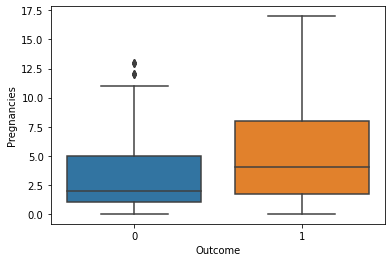

In [15]:
sns.boxplot(x = 'Outcome',y = 'Pregnancies',data = data)

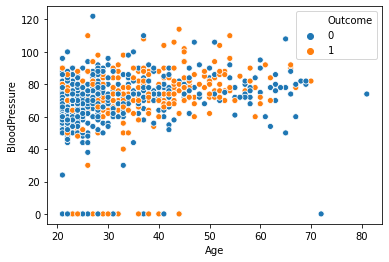

In [18]:
sns.scatterplot(x = 'Age',y = 'BloodPressure',data = data,hue = 'Outcome')

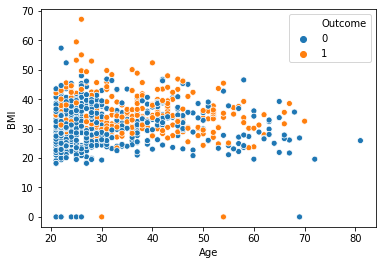

In [19]:
sns.scatterplot(x = 'Age',y = 'BMI',data = data,hue = 'Outcome')

In [0]:
X = data[data.columns[data.columns != 'Outcome']]
y = data['Outcome']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [68]:
X_train.shape

(537, 8)

In [69]:
X_test.shape

(231, 8)

In [0]:
ncols = X_train.shape[1]

In [0]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [72]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

2


In [0]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(8,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [89]:
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 537 samples, validate on 231 samples
Epoch 1/100
537/537 [==============================] - 0s 309us/step - loss: 1.8772 - accuracy: 0.5680 - val_loss: 0.9981 - val_accuracy: 0.6061
Epoch 2/100
537/537 [==============================] - 0s 78us/step - loss: 1.0400 - accuracy: 0.6127 - val_loss: 0.8865 - val_accuracy: 0.4502
Epoch 3/100
537/537 [==============================] - 0s 77us/step - loss: 0.7219 - accuracy: 0.6350 - val_loss: 0.8743 - val_accuracy: 0.6017
Epoch 4/100
537/537 [==============================] - 0s 74us/step - loss: 0.7534 - accuracy: 0.5885 - val_loss: 0.7412 - val_accuracy: 0.6710
Epoch 5/100
537/537 [==============================] - 0s 72us/step - loss: 0.7548 - accuracy: 0.6480 - val_loss: 0.6898 - val_accuracy: 0.6407
Epoch 6/100
537/537 [==============================] - 0s 76us/step - loss: 0.7130 - accuracy: 0.6257 - val_loss: 0.6970 - val_accuracy: 0.6537
Epoch 7/100
537/537 [==============================] - 0s 73us/step - loss: 0.6904 - accu

In [90]:
print('Accuracy: {}% \n Error: {}'.format(round(scores[1]*100,2), round(1 - scores[1],4)))     

Accuracy: 70.56% 
 Error: 0.2944
